In [1]:
import numpy as np 
import pandas as pd 
from scipy import linalg
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torchbnn as bnn

np.random.seed(100)  

## 1. Loading the Data


In [2]:
#Data composited every 2 metres
two_composite_filtered = pd.read_csv("Curated_data/two_composite_filtered.csv", low_memory=False)

# 2. Clustering

In [3]:
from sklearn.cluster import DBSCAN
import numpy as np

In [4]:
data = two_composite_filtered.iloc[:, 4:7]
data = np.array(data)

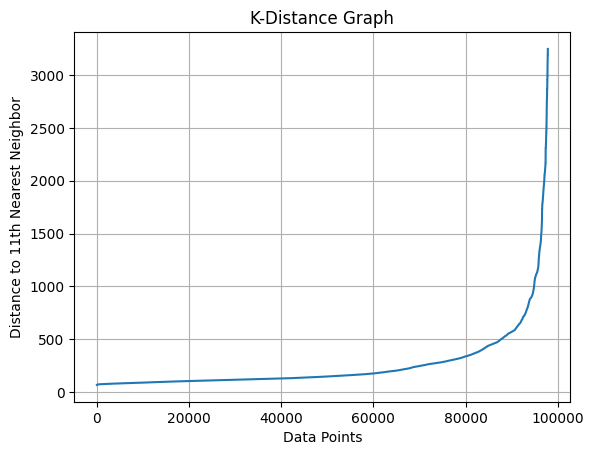

In [5]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

# Calculate distances to the k-nearest neighbors
nn = NearestNeighbors(n_neighbors=1000)  # Adjust k as needed
nn.fit(data)
distances, _ = nn.kneighbors(data)

# Sort the distances
sorted_distances = np.sort(distances[:, -1])

# Plot the k-distance graph
plt.plot(range(len(data)), sorted_distances)
plt.xlabel("Data Points")
plt.ylabel("Distance to 11th Nearest Neighbor")
plt.title("K-Distance Graph")
plt.grid()
plt.show()


In [6]:
epsilon = 250 # Your chosen threshold distance
dbscan = DBSCAN(eps=epsilon, min_samples=100)  # Adjust min_samples as needed
clusters = dbscan.fit_predict(data)


C:\Users\flea0265\AppData\Local\Temp\ipykernel_15012\1091287695.py:17: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=color, label=f'Cluster {label}')


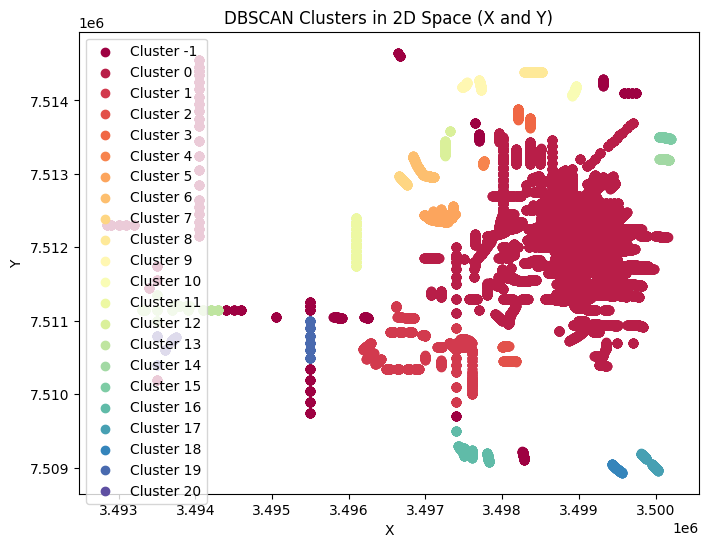

In [7]:
import matplotlib.pyplot as plt

# Assuming you have already applied DBSCAN and obtained the 'clusters' labels

# Create a 2D scatter plot with two dimensions (X and Y)
plt.figure(figsize=(8, 6))

# Get unique cluster labels
unique_labels = np.unique(clusters)

# Define colors for each cluster
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

# Plot each point with a unique color based on its cluster label
for label, color in zip(unique_labels, colors):
    cluster_points = data[clusters == label]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=color, label=f'Cluster {label}')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('DBSCAN Clusters in 2D Space (X and Y)')

plt.legend()
plt.show()


In [ ]:
len(data[clusters==0])

In [ ]:
    cluster_points = data[clusters == 0]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=color, label=f'Cluster {label}')

In [ ]:
# Assuming 'cluster_0_data' contains the data points in cluster 0
# 'cluster_0_data.csv' is the desired file name

#cluster_0_data.to_csv('cluster_0_data.csv', index=False)


In [ ]:
# Assuming 'clusters' contains cluster labels and 'two_composite_filtered' is your original DataFrame
cluster_label_to_select = 0  # The cluster label you want to select

# Filter the DataFrame to select only the data points in cluster 0
cluster_0_data = two_composite_filtered[clusters == cluster_label_to_select]

# 'cluster_0_data' now contains only the data points in cluster 0


# Analysis on minearology and sulfides

In [48]:
for column in two_composite_filtered:
    print(column)

Sample Number
Name
Depth From
Depth To
X
Y
Z
Length
Alt1_Code
Alt1_Int
Alt1_Style
Alt2_Code
Alt2_Int
Alt2_Style
Au_ppb
Comments
Core_Angle
Core_Diameter
CoreLoss_m
Cumulate
DataSet
Date_Logged
Density
Density_gcm3
Density_kgm3
Dest
Gamma_uRh
Gangue_Min
Interval_Length
Ir_ppb
Ja
Jn
Jr
Lith1_Code
Logged_By
Min1_Code
Min1_Pct
Min1_Style
Min2_Code
Min2_Pct
Min2_Style
Min3_Code
Min3_Pct
Min3_Style
Ore_Type
Ori_Confidence
Orig_Lith
Os_ppb
Pd_ppb
Proportion (Alt1_Code)
Proportion (Alt1_Int)
Proportion (Alt1_Style)
Proportion (Alt2_Code)
Proportion (Alt2_Int)
Proportion (Alt2_Style)
Proportion (Comments)
Proportion (DataSet)
Proportion (Date_Logged)
Proportion (Gangue_Min)
Proportion (Lith1_Code)
Proportion (Logged_By)
Proportion (Min1_Code)
Proportion (Min1_Style)
Proportion (Min2_Code)
Proportion (Min2_Style)
Proportion (Min3_Code)
Proportion (Min3_Style)
Proportion (Ore_Type)
Proportion (Ori_Confidence)
Proportion (Orig_Lith)
Proportion (samp_id)
Proportion (SampleID)
Proportion (Sulph1_Cod

## 2. Exploratory analysis on the samples
Start by filtering for only the columns that contain mineral grades


In [ ]:
#Filter for mineral columns
two_composite_minerals = two_composite.filter(regex='pct|ppm')

### 2.1 Plot distribution of all minerals


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import math

# Assuming you have a DataFrame named 'two_composite' and a list 'two_composite_minerals'
# containing the mineral names you want to plot

# Create a figure and axis for the plot
fig, ax = plt.subplots()

# Define the number of columns in the legend
num_columns = 3  # You can adjust this value as needed

# Calculate the number of rows required based on the number of minerals
num_minerals = len(two_composite_minerals)
num_rows = math.ceil(num_minerals / num_columns)

# Iterate through each mineral in two_composite_minerals
for i, mineral in enumerate(two_composite_minerals):
    # Select the data for the current mineral
    two_composite_1mineral = two_composite.loc[:, ["Name", 'X', 'Y', 'Z', mineral]]
    
    # Drop rows with NaN values in the mineral column
    two_composite_1mineral = two_composite_1mineral.dropna(subset=[mineral])
    
    # Plot a histogram for the current mineral
    ax.hist(two_composite_1mineral[mineral], bins=100, range=[-5, 200], alpha=0.5, label=mineral)

# Create a legend with multiple columns
legend = ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=num_columns)

# Add labels and a title
ax.set_xlabel('Value')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Minerals')

# Show the plot
plt.show()


### 2.2 Analysing the comments column for unusual values
The values -5, -2, -1, 1, 2, 3 have a suspicously high amount of samples, so here I take a look at the `Comments` column to see if there's any insights

In [ ]:
# Define the condition for filtering
condition_column = 'Comments'  # Column to check for non-null values
condition_value = -1        # Desired condition value

pd.set_option('display.max_colwidth', 2)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Create an empty list to store the results
results = []

# Iterate through all columns in the "two_composite" DataFrame
for column in two_composite.columns:
    # Check if the column is not the condition_column and if it contains the desired condition_value
    if column != condition_column and (two_composite[column] == condition_value).any():
        # Filter the "two_composite" DataFrame based on the condition for the current column
        filtered_df = two_composite.loc[(two_composite[column] == condition_value) & two_composite[condition_column].notna(), condition_column]
        # Append the results to the list
        results.append((column, filtered_df))

# Print the non-null "Comments" values for each column that meets the condition
for column, result in results:
    print(f"Column: {column}")
    print(result)


### 2.3 Temporary measure: remove the unusual values

In [ ]:
two_composite_1mineral = two_composite_1mineral.loc[(two_composite_1mineral[mineral] > 0) & (two_composite_1mineral[mineral] != 3) ]

In [ ]:
#Only remove negative values from the mineral columns
list_of_columns = two_composite_minerals.columns
two_composite_filtered = two_composite[(two_composite[list_of_columns] > 0.1) & (two_composite[list_of_columns] != 3) & (two_composite[list_of_columns] != 2) & (two_composite[list_of_columns] != 1) & (two_composite[list_of_columns] != 4)]


In [ ]:
# Apply filtering condition to selected columns
filtered_columns = two_composite[list_of_columns][(two_composite[list_of_columns] > 0.1) & 
                                                  (two_composite[list_of_columns] != 3) &
                                                  (two_composite[list_of_columns] != 2) &
                                                  (two_composite[list_of_columns] != 1) &
                                                  (two_composite[list_of_columns] != 4)]

# Combine the filtered columns with the original DataFrame
two_composite_filtered = two_composite.drop(columns=list_of_columns)
two_composite_filtered = pd.concat([two_composite_filtered, filtered_columns], axis=1)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import math

# Assuming you have a DataFrame named 'two_composite' and a list 'two_composite_minerals'
# containing the mineral names you want to plot

# Create a figure and axis for the plot
fig, ax = plt.subplots()

# Define the number of columns in the legend
num_columns = 3  # You can adjust this value as needed

# Calculate the number of rows required based on the number of minerals
num_minerals = len(two_composite_minerals)
num_rows = math.ceil(num_minerals / num_columns)

# Iterate through each mineral in two_composite_minerals
for i, mineral in enumerate(two_composite_minerals):
    # Select the data for the current mineral
    two_composite_1mineral = two_composite_filtered.loc[:, ["Name", 'X', 'Y', 'Z', mineral]]
    
    # Drop rows with NaN values in the mineral column
    two_composite_1mineral = two_composite_1mineral.dropna(subset=[mineral])
    
    # Plot a histogram for the current mineral
    ax.hist(two_composite_1mineral[mineral], bins=100, range=[-5, 50], alpha=0.5, label=mineral)

# Create a legend with multiple columns
legend = ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=num_columns)

# Add labels and a title
ax.set_xlabel('Value')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Minerals')

# Show the plot
plt.show()

In [ ]:
#Subset data for each mineral
mineral = 'Density_gcm3'
two_composite_1mineral = two_composite_filtered.loc[:,["Name", 'X', 'Y', 'Z', mineral]]
two_composite_1mineral = two_composite_1mineral.dropna(subset=[mineral])

#hole = 'KV397'
hole = 'KV-NME001'
two_composite_1mineral_1hole = two_composite_1mineral.loc[two_composite_1mineral['Name'] == hole]

In [ ]:
two_composite_filtered['Density_gcm3'].hist(bins=500)

#### Columns

Just the columns I didn't understand

[Gangue_Min, Interval_Length, Length*, Core_Angle**, Core_Diameter***, Dataset, Dest, Gamma_uRh, Gangue_Min,
Interval_Length, Ja****, Jn, Jr, Logged_By^, Ore_Type, Ori_Confidence, Reading_den, Reading_susc, 
Recovery_m, Recovery_Pct, Res_Wenner_ohmm, RQD_m, RQD_Pct, SulphTot_pct, Susc_SI, Vein1_Comp]



#### Questions:

1) Why are the Name of the holes different from the ones I have in a different dataset?
2) Why are there Alt1 and Alt2 cols, what's Int, Style, same question for Lith, Min, Sulph, Vein
3) Could the comments be useful?
4) Density and density_gcm3 are slightly different??
5) ^Companies, people, tool?
6) Orig_Lith diff to lith?
7) What are the "Proportion (...)"?
8) What do the 0 and 1 values mean for samp_id? Is it identical to SampleID?
9) Vein1_Comp, pct, style etc? 
10) What do the 2 and 3 mean in Weathering, why does it have also some odd values that are diff

#### Notes:

1) *Length is in the list because I don't understand how all the values are not 1
2) **Core_Angle goes from 0 to 90 
3) ***Core_Diameter is just 0s 
4) ****Ja mostly discrete values, same with Jn, Jr